In [1]:
# merge new statistics as a sum-up file
import pandas as pd 
import os,glob
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import hydroeval as he
from matplotlib.colors import LogNorm
from pylab import *
import pandas as pd 
from sklearn.datasets import make_regression

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
#from xgboost import XGBRegressor
import sklearn.neural_network as nn

from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
def merge_xls(filelist):
    df = pd.DataFrame()
    for file in filelist:
        df = df.append(pd.read_excel(file),ignore_index = True)
    return df

def link_newstat(oldfile,newfile):
    df_1 =  pd.read_excel(oldfile)
    df_1['I_slope'] = df_1['I_slope'].round(3)
    df_1 = df_1.drop_duplicates(keep = 'last')
    df_1 = df_1.reset_index(drop = True)
    
    df_2 =  pd.read_excel(newfile)
    df_2 = df_2.rename(columns={'mean':'mean_bio'})
    df_2.loc[:,'mean_copy'] = df_2['mean_bio']

    df_1['mean_bio'] = df_1['mean_bio'].round(1)
    df_1['mu'] = df_1['mu'].round(3)
    df_1['alpha'] = df_1['alpha'].round(3)
    df_1['I_slope'] = df_1['I_slope'].round(3)

    df_2['mean_bio'] = df_2['mean_bio'].round(1)
    df_2['mu'] = df_2['mu'].round(3)
    df_2['alpha'] = df_2['alpha'].round(3)
    df_2['I_slope'] = df_2['I_slope'].round(3)

    df_3 = pd.merge(df_1,df_2, how='inner', on=['mu','alpha','I_slope','mean_bio'])
    df_3 = df_3.drop(['entropy','mean_copy'],axis=1)
    return df_3



In [2]:
allfile = '/Net/Groups/BGI/scratch/swang/Data/statistics/All_statistics.xlsx'
df_1 =  pd.read_excel(allfile,engine='openpyxl')
df_2=df_1[df_1.columns[[0,2,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,22]]]
df_3 = df_2.loc[(df_2['Shuffle_index'] > 0)].reset_index(drop = True)
df_all= df_3.drop(['entropy','Shuffle_index'],axis=1)
df_all = df_all.rename(columns={'beta':'I_slope'})
df_all

,mu,alpha,I_slope,mean_bio,median_bio,range_bio,var_bio,std_bio,cv_bio,skew_bio,kurt_bio,prc25_bio,prc75_bio,Trimean,shannon,contrast,correlation,energy,homogeneity,GPP
0,0.050,1.75,0.30,11113.530189,9903.690730,15306.387939,3.805967e+07,6169.251870,55.511181,1.033175,4.215229,6349.295382,14566.831972,10180.877203,6.063930,0.654842,0.169172,0.230260,0.761160,2127.628932
1,0.050,1.75,0.30,11116.706694,9902.039133,15317.951580,3.816510e+07,6177.790804,55.572131,1.045173,4.323705,6345.727314,14564.677232,10178.620703,5.970171,0.587230,0.159405,0.259776,0.774843,2127.857426
2,0.050,1.75,0.30,11120.256833,9899.770753,15318.349609,3.818695e+07,6179.559020,55.570290,1.035271,4.185547,6346.842896,14581.248577,10181.908245,6.061867,0.650888,0.169252,0.232552,0.762059,2127.701718
3,0.050,1.75,0.30,11113.782212,9891.555601,15328.004988,3.808106e+07,6170.985195,55.525518,1.021677,4.067661,6348.572618,14566.268851,10174.488167,6.272059,0.846070,0.186525,0.180026,0.731281,2127.617319
4,0.050,1.75,0.30,11117.699520,9898.849200,15311.942546,3.820664e+07,6181.151972,55.597401,1.041563,4.258760,6346.209397,14573.820771,10179.432142,5.952103,0.576736,0.159117,0.264736,0.777312,2127.790124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107095,0.025,1.75,0.25,11069.070134,10253.088806,13051.141635,2.754446e+07,5248.281384,47.413932,0.989662,4.551938,7252.365913,13889.823666,10412.091798,5.798161,0.536536,0.097711,0.278241,0.776657,1544.477584
107096,0.025,1.75,0.25,11067.161998,10252.881912,13044.818949,2.756930e+07,5250.647616,47.443487,0.995108,4.689211,7247.242215,13892.923797,10411.482459,5.661800,0.448143,0.078558,0.346823,0.803511,1544.590820
107097,0.025,1.75,0.25,11066.875096,10248.360422,13046.621031,2.760380e+07,5253.932255,47.474397,1.010408,4.903758,7243.285945,13896.596573,10409.150840,5.540575,0.368638,0.066883,0.418025,0.830336,1544.634366
107098,0.025,1.75,0.25,11067.748357,10251.401270,13039.633992,2.755896e+07,5249.663052,47.432078,1.003359,4.768276,7254.953554,13886.093210,10410.962326,5.564229,0.384862,0.069786,0.401943,0.824384,1544.605044


# 1. Multi_output

In [3]:
def Multi_1(df_train, df_test, texture=True):
    
    if texture is True:
        j = df_train.shape[1]
    elif texture is False:
        j = -1
    else:
        print('Shannon argument input is wrong!')
    
    df = df_train
    df_x = df.iloc[:,3:j]
    df_y = df.iloc[:,0:3]

    x = df_x.values
    y = df_y.values

    # define model
    #model = LinearRegression()
    #model = KNeighborsRegressor()
    model = RandomForestRegressor(n_jobs = 20)
    # (direct multioutput wrapper model)
    #model = MultiOutputRegressor(RandomForestRegressor())
    # (chained multioutput wrapper model)
    #model = RegressorChain(RandomForestRegressor(n_jobs = 20), order = [0,2,1])
    # fit model
    model.fit(x, y)

    # validation
    #df_v =  pd.read_excel('/Net/Groups/BGI/people/swang/Codes/regression/sum_all.xls')
    df_v =  df_test
    df_vx = df_v.iloc[:,3:j]
    df_vy = df_v.iloc[:,0:3]

    # make a prediction
    yhat = model.predict(df_vx)
    # summarize prediction
    #print(yhat[0])

    y_pre = pd.DataFrame(yhat)

    mu_r2 = r2_score(df_vy.iloc[:,0], y_pre.iloc[:,0])
    Is_r2 = r2_score(df_vy.iloc[:,2], y_pre.iloc[:,2])
    a_r2 = r2_score(df_vy.iloc[:,1], y_pre.iloc[:,1])
    mu_nse = he.evaluator(he.nse,y_pre.iloc[:,0],df_vy.iloc[:,0])
    Is_nse = he.evaluator(he.nse,y_pre.iloc[:,2],df_vy.iloc[:,2])
    a_nse = he.evaluator(he.nse,y_pre.iloc[:,1],df_vy.iloc[:,1])
    return mu_nse,Is_nse,a_nse, model

## Feature importance

/tmp/ipykernel_83036/1975853142.py:36: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  bars = ax.barh(feature_importances.index.ravel(),feature_importances.values.ravel(),color='gray')#color='#0057b7'


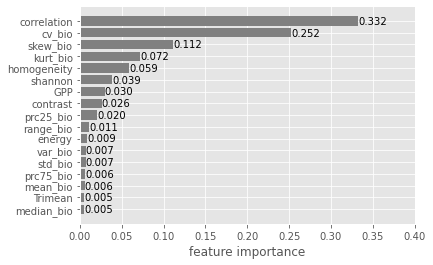

Multi-Output: 
    Mu:0.9700394102583225 
    Is:0.9801478507392604 
    Alpha:0.9653312334096457 



In [4]:
plt.style.use('ggplot')
allnames = list(df_all.columns.values.tolist())
my_cv = ShuffleSplit(n_splits = 10,test_size = .1)
index = 1
train_index = []
test_index = []

Multi_mus = []
Multi_Iss = []
Multi_as = []
Chained_mus = []
Chained_Iss = []
Chained_as = []
for train, test in my_cv.split(df_all.values):
    type(train)
    train_index.append(train)
    test_index.append(test)

for i in range(0,len(train_index)):
    fig, ax = plt.subplots()
    
    df_train = df_all.iloc[train_index[i]]
    df_test = df_all.iloc[test_index[i]]
    #print('Shuffle No.{}'.format(i+1),'\n','Multi-Output:')
    a,b,c,model = Multi_1(df_train, df_test, True)
    Multi_mus.append(a)
    Multi_Iss.append(b)
    Multi_as.append(c)
    importance = model.feature_importances_
    names = allnames[3:]
    #plt.barh(names,importance)
    feature_importances = pd.DataFrame(importance, index = names, columns=['importance']).sort_values('importance')
    plt.rcParams['figure.dpi'] = 300
    plt.rcParams['figure.figsize'] = (5,4)
    #feature_importances.plot(ax=ax,xlim=[0,0.5],kind = 'barh')
    bars = ax.barh(feature_importances.index.ravel(),feature_importances.values.ravel(),color='gray')#color='#0057b7'
    #ax.invert_yaxis() 
    ax.bar_label(bars,fmt='%.3f')
    ax.set_xlim(right=0.4)
    ax.set_xlabel('feature importance')
    plt.savefig('./barh.png',dpi=300, bbox_inches = 'tight')
    plt.show()
    break
    
print('Multi-Output:','\n','  ','Mu:{}'.format(np.mean(Multi_mus)),'\n','  ','Is:{}'.format(np.mean(Multi_Iss)),'\n','  ','Alpha:{}'.format(np.mean(Multi_as)),'\n')
#print('Chained-Output:','\n','  ','Mu:{}'.format(np.mean(Chained_mus)),'\n','  ','Is:{}'.format(np.mean(Chained_Iss)),'\n','  ','Alpha:{}'.format(np.mean(Chained_as)),'\n')

In [8]:
plt.savefig('./barh.png')

<Figure size 1800x1200 with 0 Axes>

## Reducing the number of input features

In [5]:
all_features = feature_importances.index
# take shuffle NO.1 as example

Multi_mus = []
Multi_Iss = []
Multi_as = []
for i in range(0,len(feature_importances.index)-1):
    exclude_features = all_features[:i+1]
    df_train = df_all.iloc[train_index[0]]
    df_test = df_all.iloc[test_index[0]]
    for f in exclude_features:
        del df_train[f] # df_train = df_train.drop(f,1)
        del df_test[f]
    
    a,b,c,model = Multi_1(df_train, df_test, True)
    Multi_mus.append(a)
    Multi_Iss.append(b)
    Multi_as.append(c)

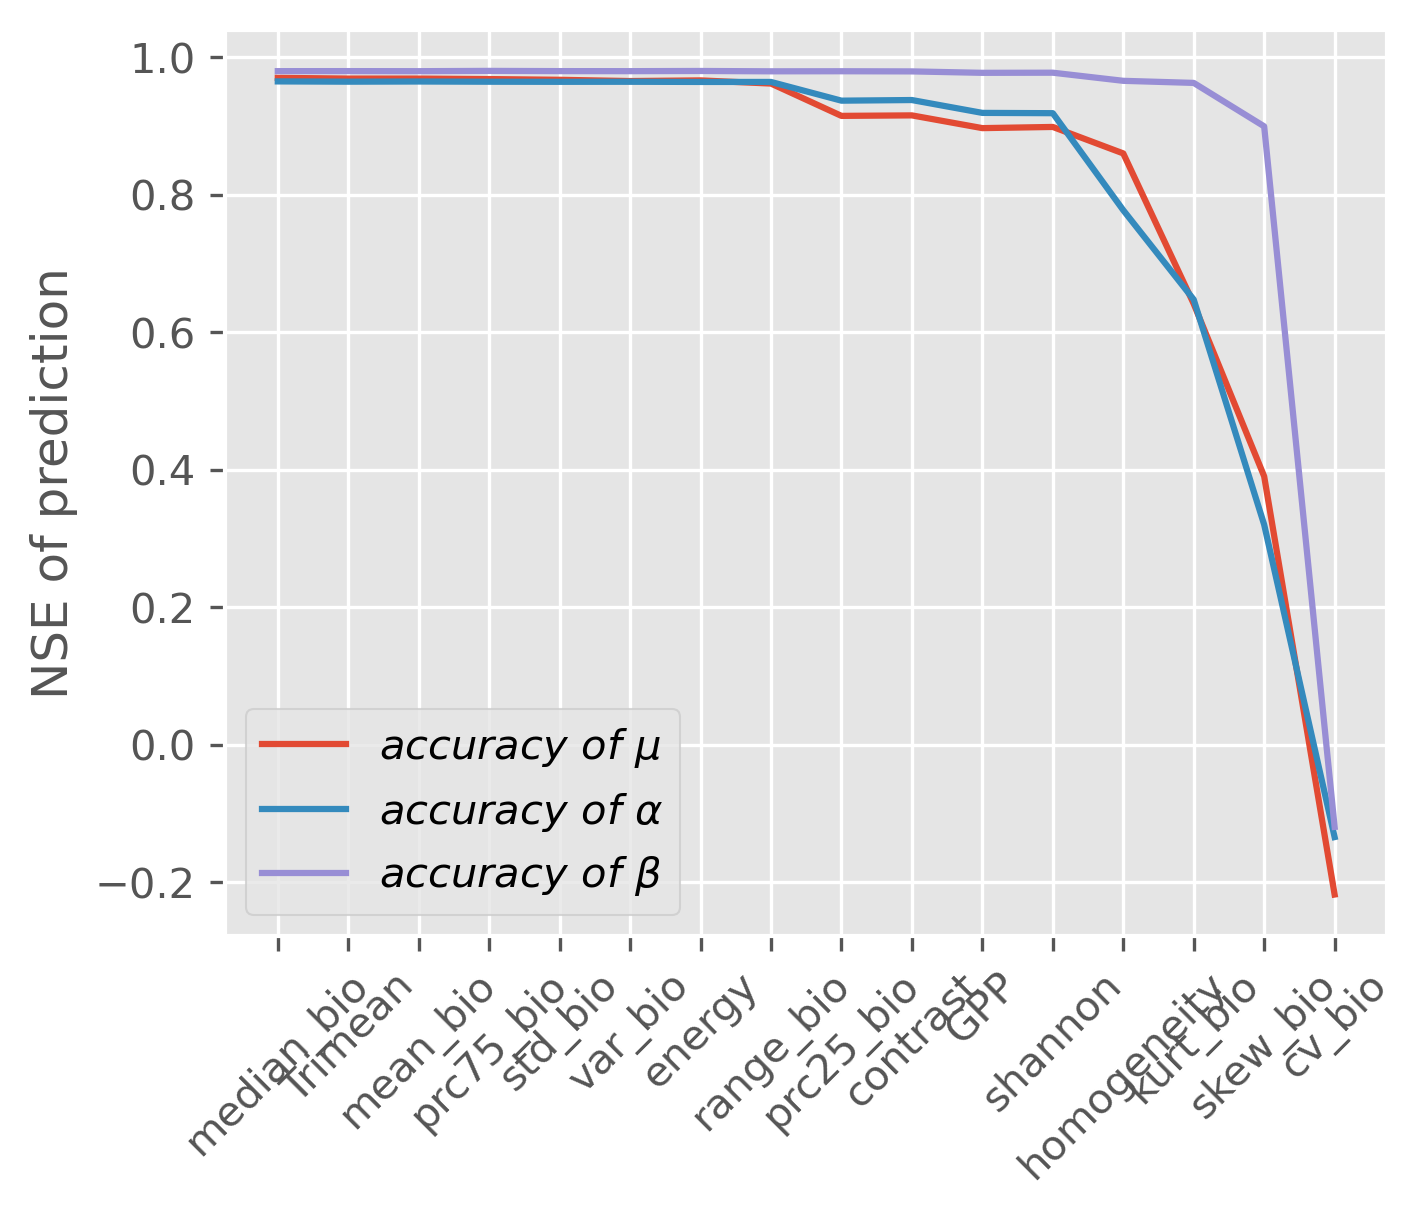

In [6]:
x = list(all_features[:-1])
plt.style.use('ggplot')
fig, ax = plt.subplots()
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = (7,3)
#ax.invert_yaxis() 
plt.plot(x,Multi_mus,label = r'$accuracy\ of\ \mu$')
plt.plot(x,Multi_as,label = r'$accuracy\ of\ \alpha$')
plt.plot(x,Multi_Iss,label = r'$accuracy\ of\ \beta$')
#ax.set_ylim(bottom=0)
plt.xticks(rotation=45)
plt.ylabel('NSE of prediction')
plt.legend(loc='lower left')
#plt.rcParams["legend.loc"] = 'lower left'

#plt.savefig('./featureimportance_reduce_multi.png',dpi=300,bbox_inches = 'tight')
plt.show()



# 2. Single_output

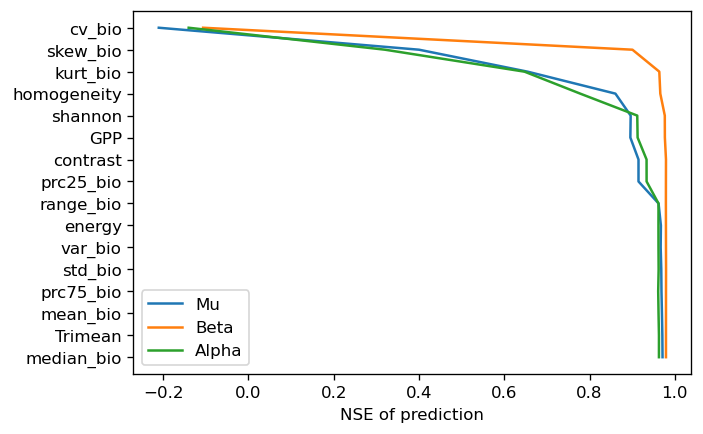

In [34]:
x = list(all_features[:-1])

plt.plot(Multi_mus,x,label = 'Mu')
plt.plot(Multi_Iss,x,label = 'Beta')
plt.plot(Multi_as,x,label = 'Alpha')
#plt.xticks(rotation=90)
plt.xlabel('NSE of prediction')
plt.legend()
plt.show()

In [8]:
def SingleRF_1 (df_train, df_test, target):
    import warnings
    import hydroeval as he
    import numpy as np
    warnings.filterwarnings('ignore')
    if target == 'mu':
        j = 0
    elif target == 'beta':
        j = 2
    elif target == 'alpha':
        j = 1
    else:
        print('Wrong inputs for types of target variable!! Please enter mu, beta or alpha!')
    
    df_train = df_train.reset_index(drop = True)
     
    x_train = df_train.iloc[:,3:]
    y_train = df_train.iloc[:,j]
    x_test = df_test.iloc[:,3:]
    y_test = df_test.iloc[:,j]
    
    mu_r2s = []
    Is_r2s = []
    alpha_r2s = []

    mu_nses = []
    Is_nses = []
    alpha_nses = []

    # fit model1
    model = RandomForestRegressor(n_jobs = 20)
    model.fit(x_train.values, y_train.values)   

    # predict the mu and Is by shuffle i+1
    M_pre = model.predict(x_test.values)

    r2 = r2_score(y_test, M_pre)
   
    nse = he.evaluator(he.nse,M_pre,y_test)
    
    return nse,model
    

10

Single RF: 
    Mu:0.9980954964629771 
    Alpha:0.963351211438527 
    Beta:0.9833169042672932 



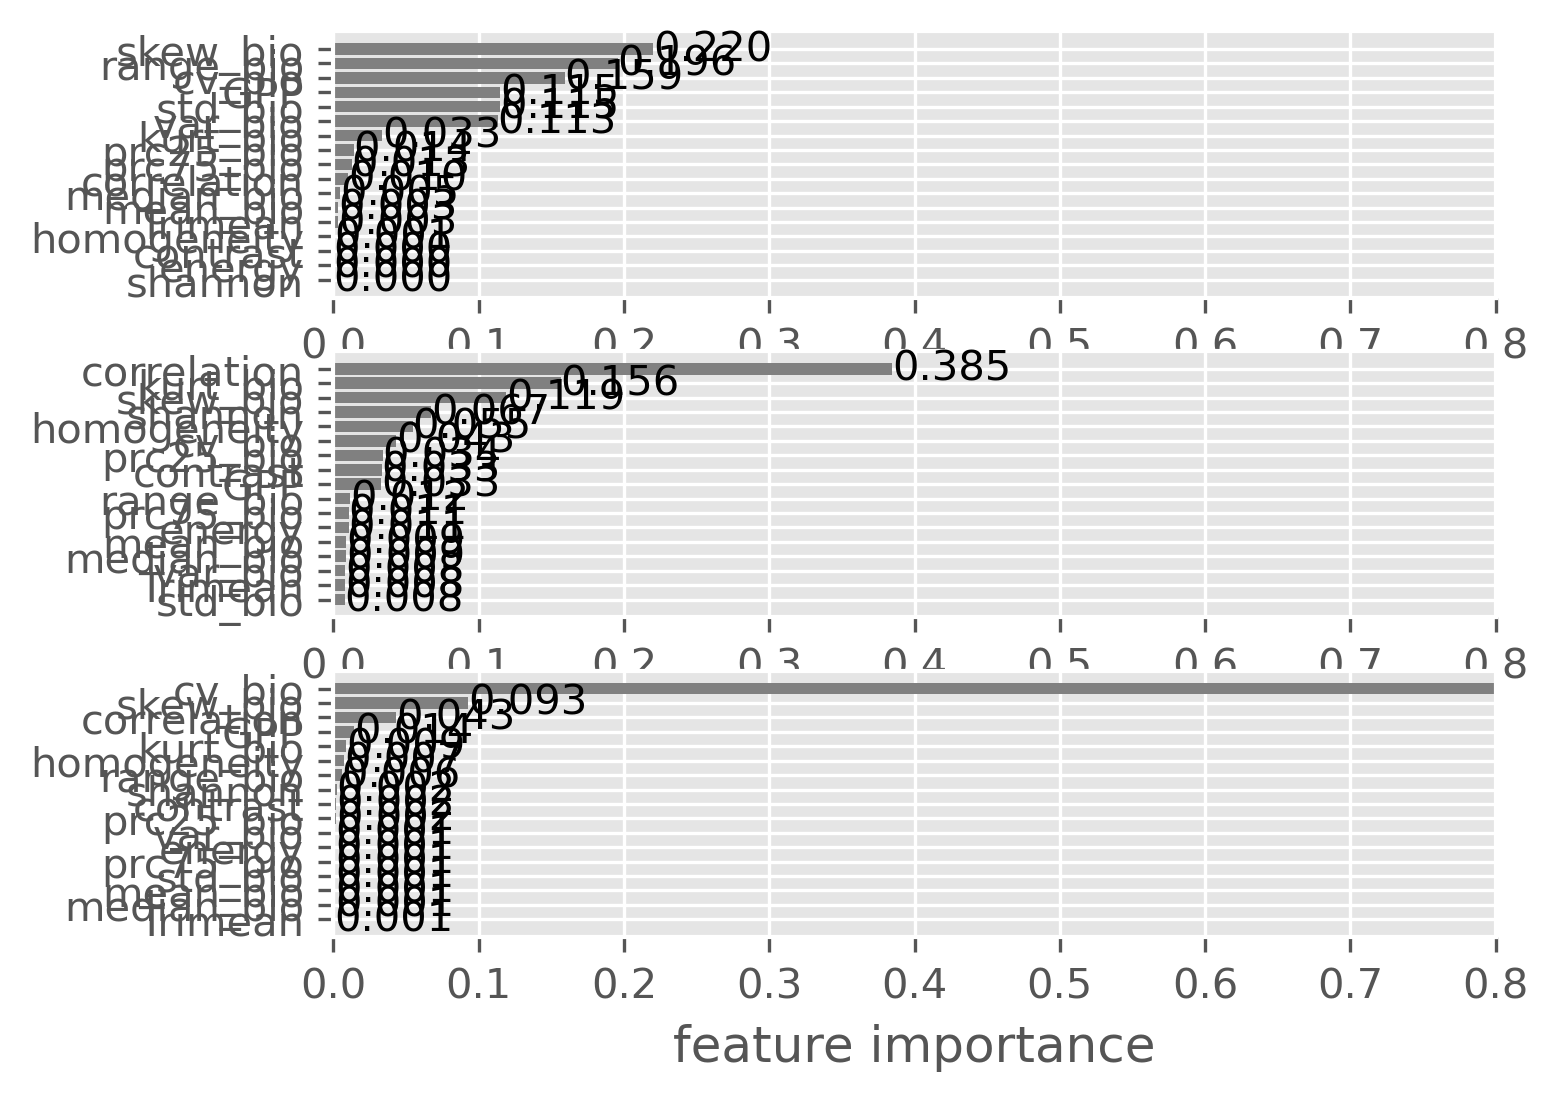

In [10]:
df_all = df_all.reset_index(drop = True)
allnames = list(df_all.columns.values.tolist())
#plt.rcParams['figure.dpi'] = 120
my_cv = ShuffleSplit(n_splits = 10,test_size = .1)
index = 1
train_index = []
test_index = []

Single_mus = []
Single_alphas = []
Single_betas = []
for train, test in my_cv.split(df_all.values):
    type(train)
    train_index.append(train)
    test_index.append(test)

for i in range(0,len(train_index)):
    i=2
    fig, axs = plt.subplots(3)
    plt.rcParams['figure.dpi'] = 300
    plt.rcParams['figure.figsize'] = (10,15)
    plt.style.use('ggplot')
    
    df_train = df_all.iloc[train_index[i]]
    df_test = df_all.iloc[test_index[i]]
    #print('Shuffle No.{}'.format(i+1),'\n','Multi-Output:')
    mu_nse,mu_model = SingleRF_1(df_train, df_test, 'mu')
    mu_importance = mu_model.feature_importances_
    names = allnames[3:]
    feature_importances1 = pd.DataFrame(mu_importance, index = names, columns=['importance']).sort_values('importance')
    bars = axs[0].barh(feature_importances1.index.ravel(),feature_importances1.values.ravel(),color='gray')#color='#0057b7'
    #ax.invert_yaxis() 
    axs[0].bar_label(bars,fmt='%.3f')
    axs[0].set_xlim(right=0.8)
    axs[0].set_xlabel('feature importance')
    #plt.savefig('./barh.png',dpi=300, bbox_inches = 'tight')
    #plt.show()
    
    
    #feature_importances1.plot(kind = 'barh')
    Single_mus.append(mu_nse)
    
    alpha_nse,alpha_model = SingleRF_1(df_train, df_test, 'alpha')
    alpha_importance = alpha_model.feature_importances_
    names = allnames[3:]
    feature_importances2 = pd.DataFrame(alpha_importance, index = names, columns=['importance']).sort_values('importance')
    #feature_importances2.plot(kind = 'barh')
    bars = axs[1].barh(feature_importances2.index.ravel(),feature_importances2.values.ravel(),color='gray')#color='#0057b7'
    #ax.invert_yaxis() 
    axs[1].bar_label(bars,fmt='%.3f')
    axs[1].set_xlim(right=0.8)
    axs[1].set_xlabel('feature importance')
    Single_alphas.append(alpha_nse)
    
    beta_nse,beta_model = SingleRF_1(df_train, df_test, 'beta')
    beta_importance = beta_model.feature_importances_
    names = allnames[3:]
    feature_importances3 = pd.DataFrame(beta_importance, index = names, columns=['importance']).sort_values('importance')
    #feature_importances3.plot(kind = 'barh')
    bars = axs[2].barh(feature_importances3.index.ravel(),feature_importances3.values.ravel(),color='gray')#color='#0057b7'
    #ax.invert_yaxis() 
    axs[2].bar_label(bars,fmt='%.3f')
    axs[2].set_xlim(right=0.8)
    axs[2].set_xlabel('feature importance')
    Single_betas.append(beta_nse)
    
    
    break
    
print('Single RF:','\n','  ','Mu:{}'.format(np.mean(Single_mus)),'\n','  ','Alpha:{}'.format(np.mean(Single_alphas)),'\n','  ','Beta:{}'.format(np.mean(Single_betas)),'\n')

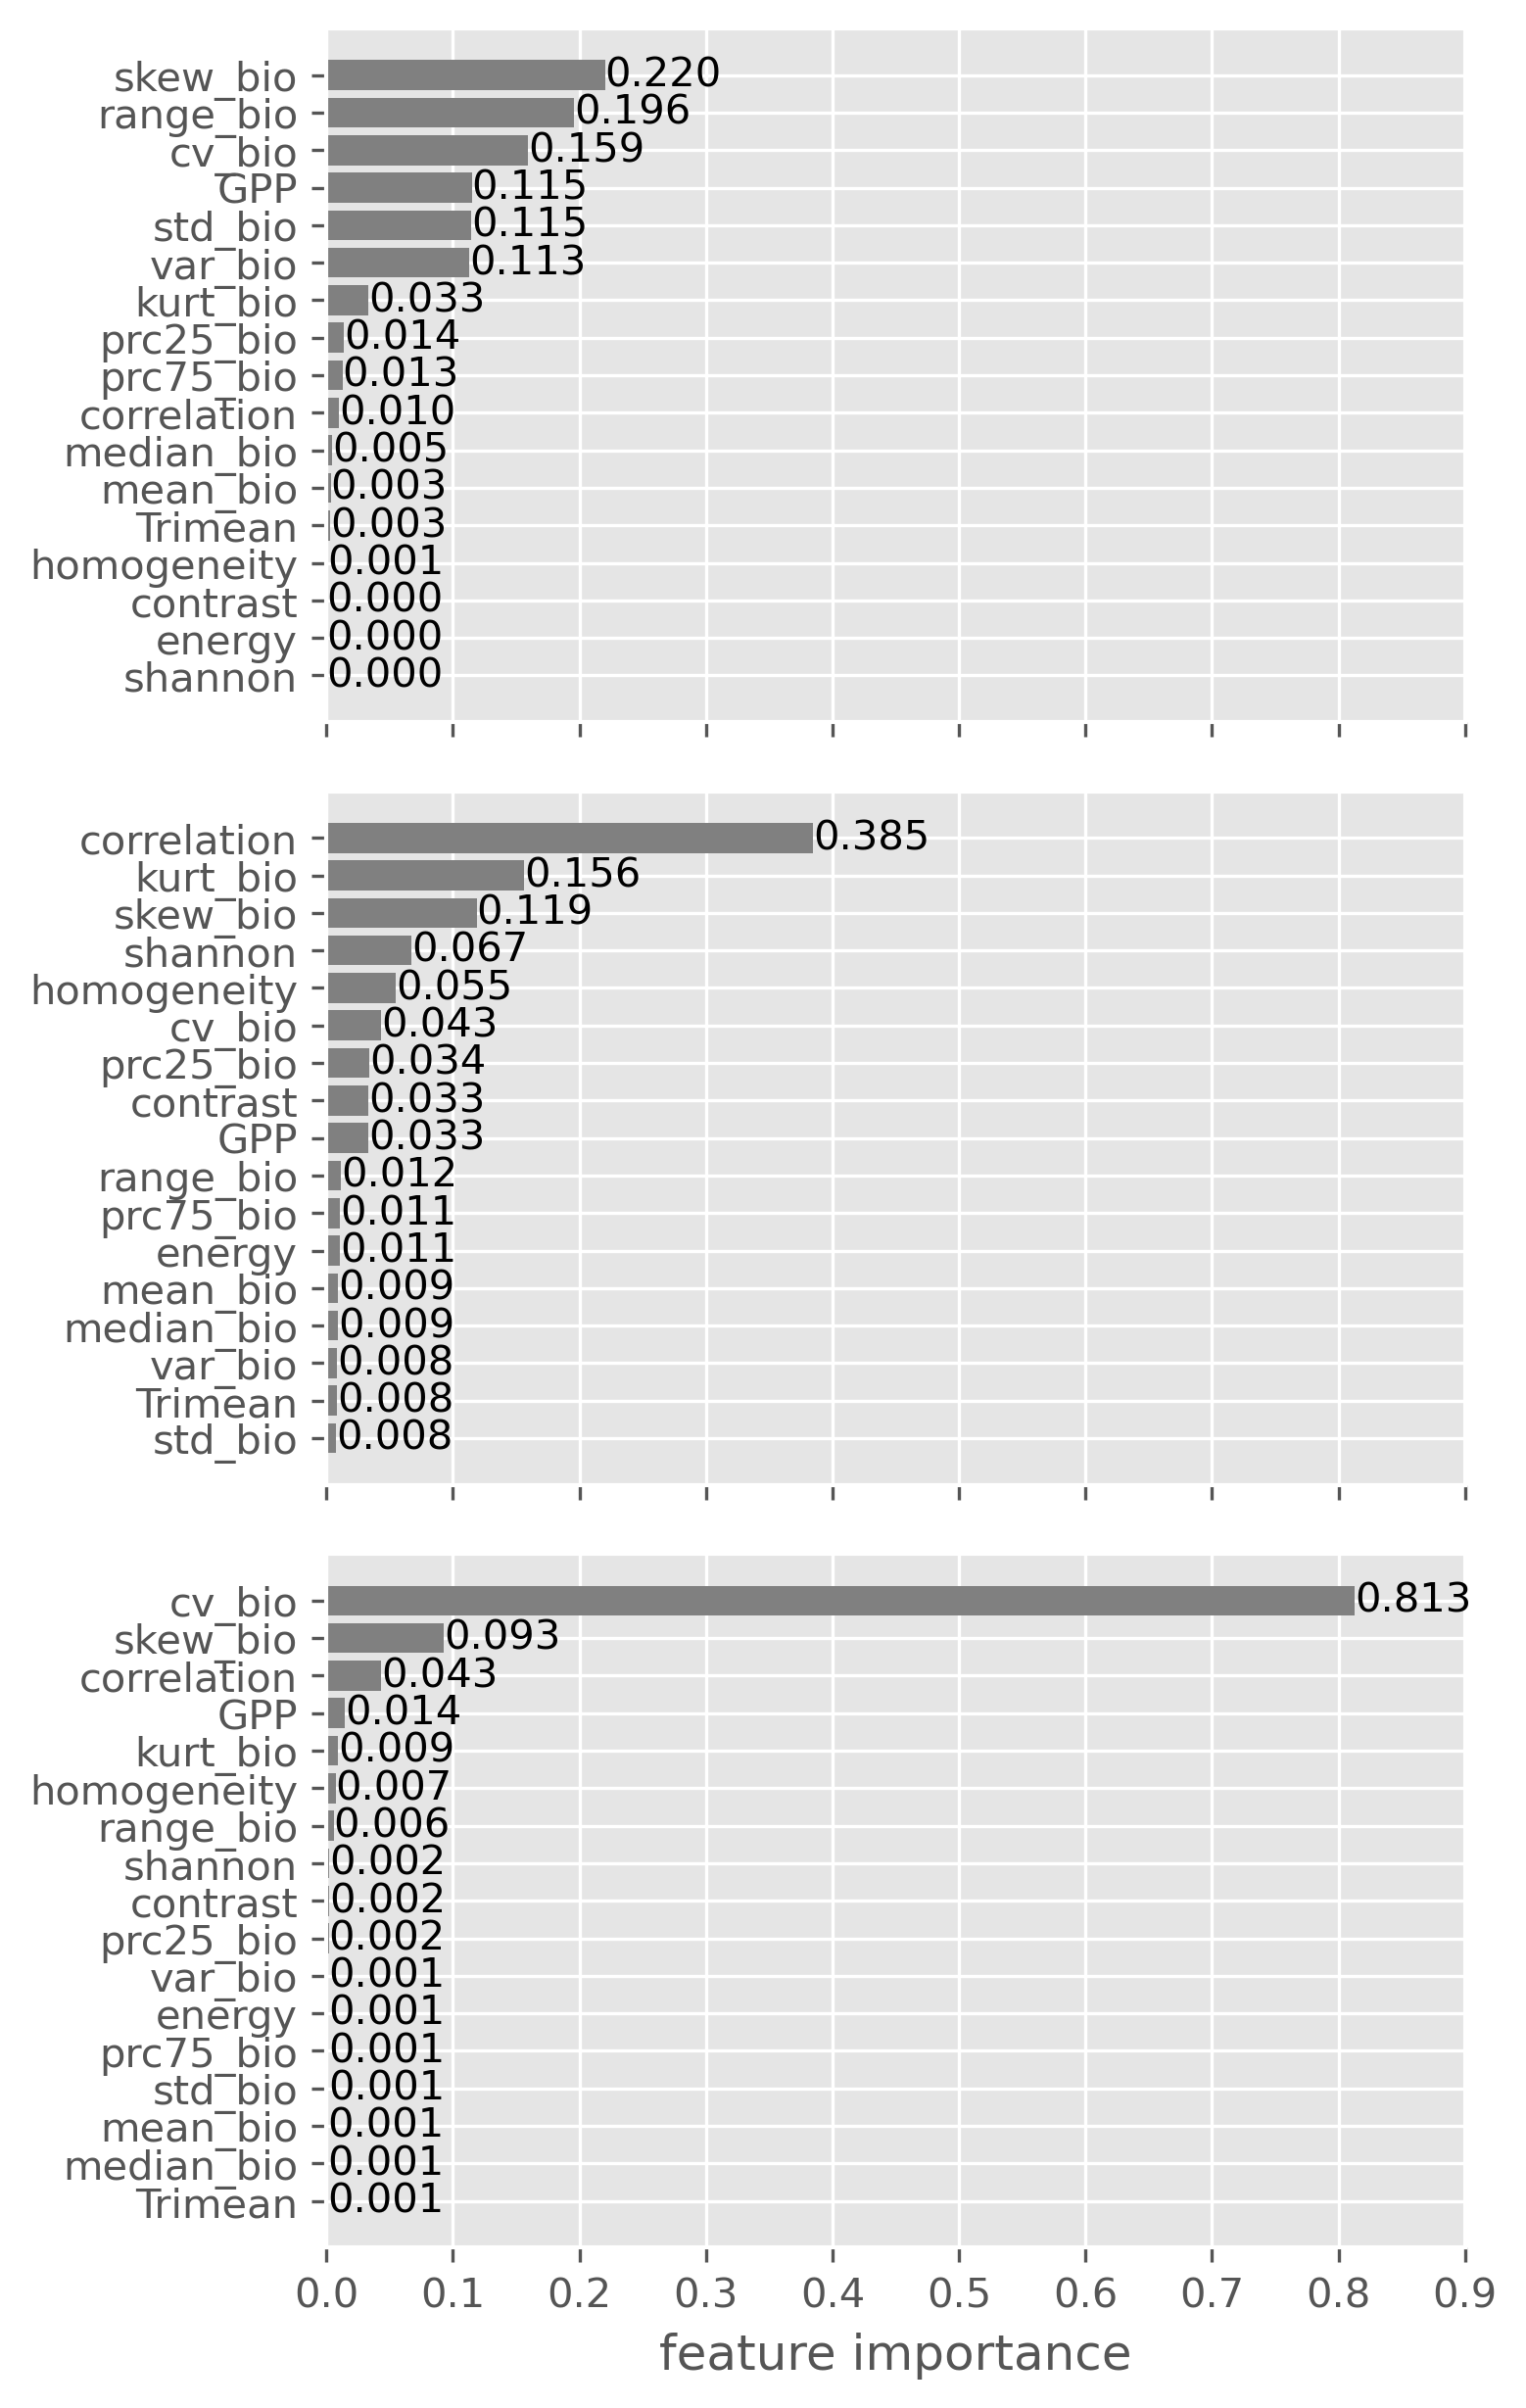

In [31]:
fig, axs = plt.subplots(3,sharex=True)
bars = axs[0].barh(feature_importances1.index.ravel(),feature_importances1.values.ravel(),color='gray')#color='#0057b7'
#ax.invert_yaxis() 
axs[0].bar_label(bars,fmt='%.3f')
axs[0].set_xlim(right=0.4)
#axs[0].set_xlabel('feature importance')


bars = axs[1].barh(feature_importances2.index.ravel(),feature_importances2.values.ravel(),color='gray')#color='#0057b7'
#ax.invert_yaxis() 
axs[1].bar_label(bars,fmt='%.3f')
axs[1].set_xlim(right=0.4)
#axs[1].set_xlabel('feature importance')

bars = axs[2].barh(feature_importances3.index.ravel(),feature_importances3.values.ravel(),color='gray')#color='#0057b7'
    #ax.invert_yaxis() 
axs[2].bar_label(bars,fmt='%.3f')
axs[2].set_xlim(right=0.9)
axs[2].set_xlabel('feature importance')
plt.subplots_adjust(wspace=0, hspace=0.1)
plt.rcParams['figure.figsize'] = (5,10)
plt.savefig('./barh_3.png',dpi=300,bbox_inches = 'tight')
plt.show()

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
colors1 = plt.cm.YlGn(np.linspace(0., 1, 11))
colors2 = plt.cm.OrRd(np.linspace(0, 1, 4))
colors3 = plt.cm.OrRd(np.linspace(0, 1, 4))
colors = np.vstack((colors1, colors2))
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)


In [32]:
Multi_mus = []
Multi_Iss = []
Multi_as = []
for i in range(0,len(feature_importances.index)-1):
    mu_features = feature_importances1.index
    alpha_features = feature_importances2.index
    beta_features = feature_importances3.index
    
    exclude_features1 = mu_features[:i+1]
    exclude_features2 = alpha_features[:i+1]
    exclude_features3 = beta_features[:i+1]
    
    df_train = df_all.iloc[train_index[0]]
    df_test = df_all.iloc[test_index[0]]
    
    for f in exclude_features1:
        del df_train[f] # df_train = df_train.drop(f,1)
        del df_test[f]
    
    mu_nse,mu_model = SingleRF_1(df_train, df_test, 'mu')
    
    df_train = df_all.iloc[train_index[0]]
    df_test = df_all.iloc[test_index[0]]
    for f in exclude_features2:
        del df_train[f] # df_train = df_train.drop(f,1)
        del df_test[f]
    alpha_nse,alpha_model = SingleRF_1(df_train, df_test, 'alpha')
    
    df_train = df_all.iloc[train_index[0]]
    df_test = df_all.iloc[test_index[0]]
    for f in exclude_features3:
        del df_train[f] # df_train = df_train.drop(f,1)
        del df_test[f]
    beta_nse,beta_model = SingleRF_1(df_train, df_test, 'beta')
    
    Multi_mus.append(mu_nse)
    Multi_Iss.append(beta_nse)
    Multi_as.append(alpha_nse)

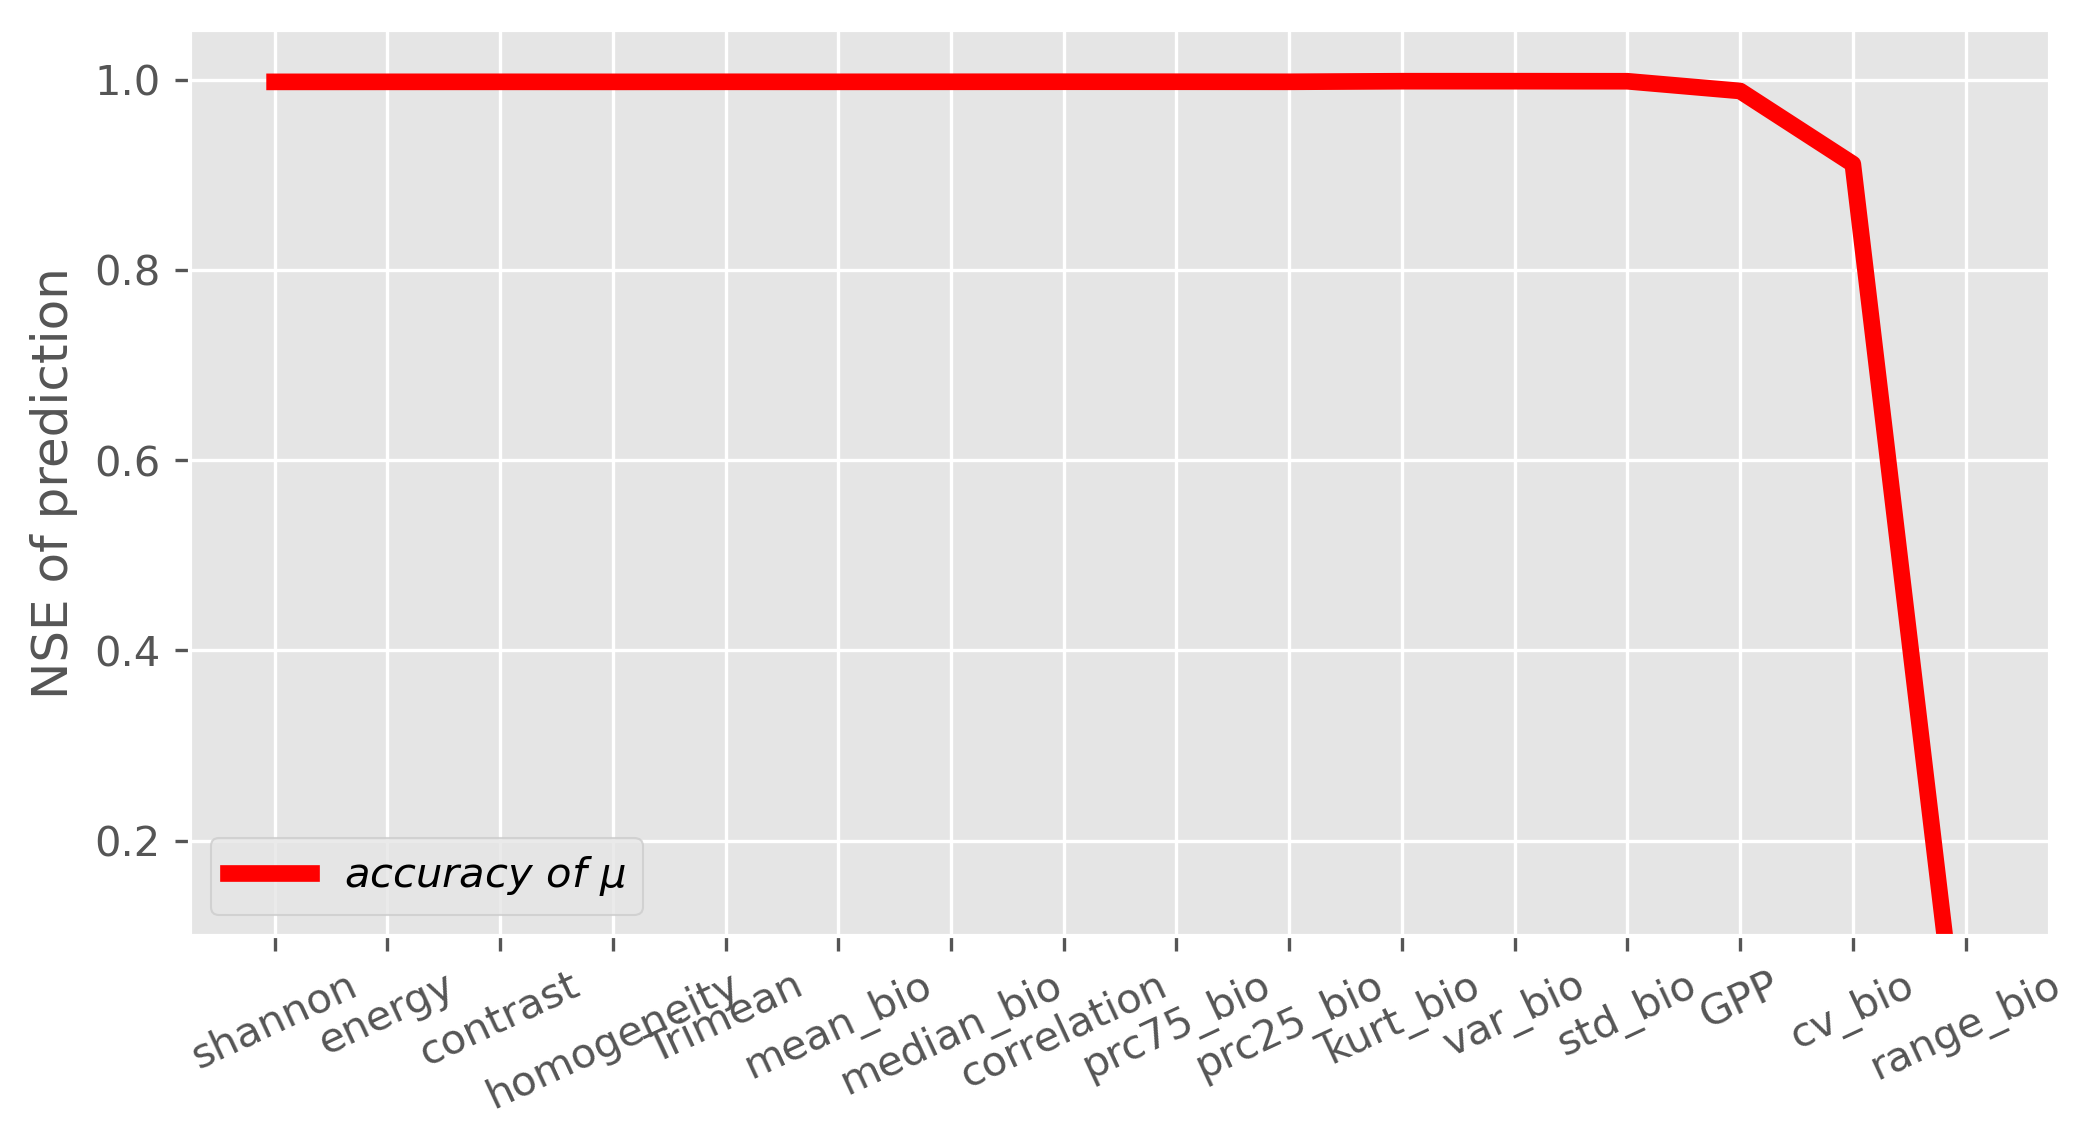

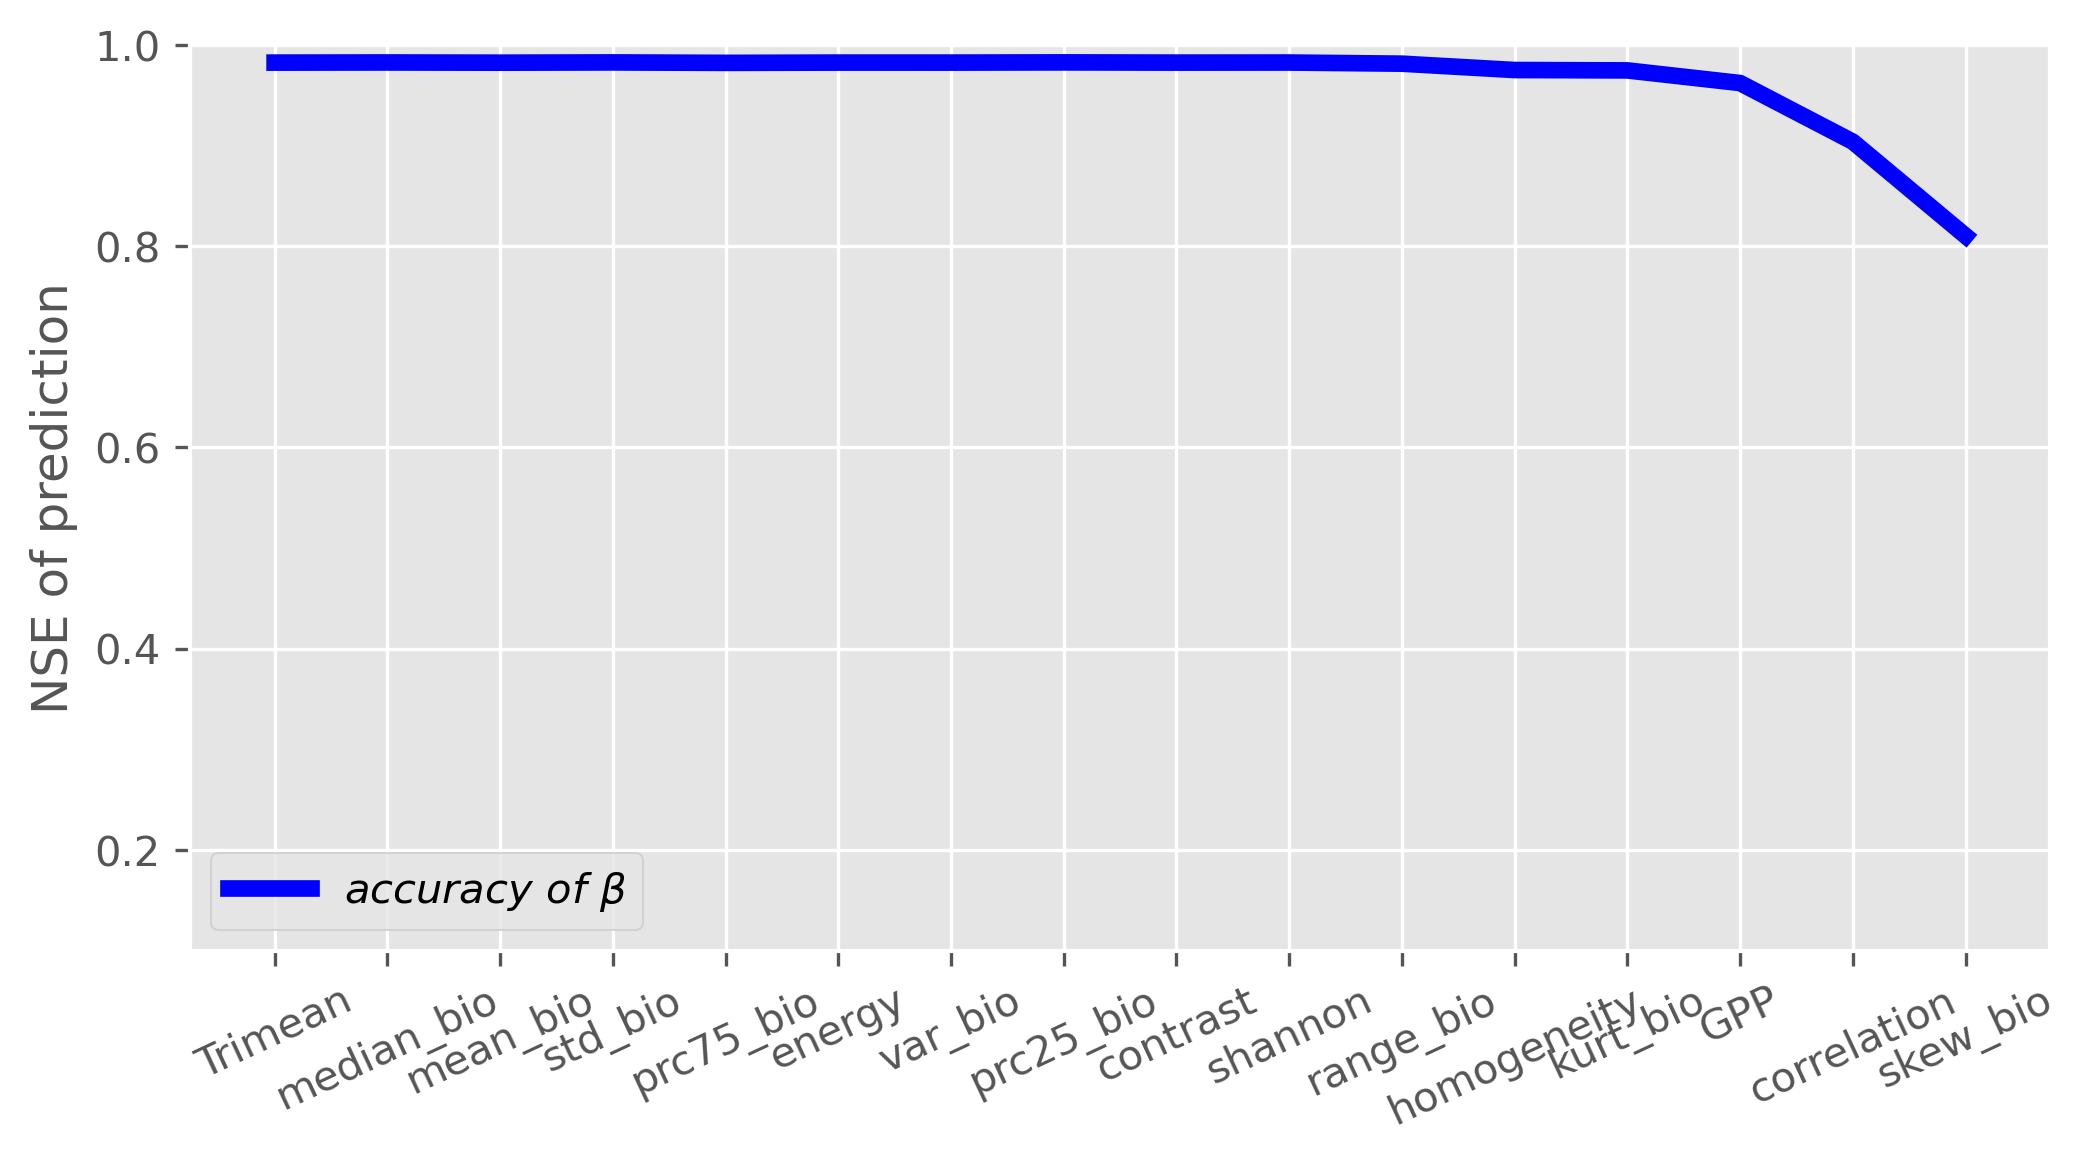

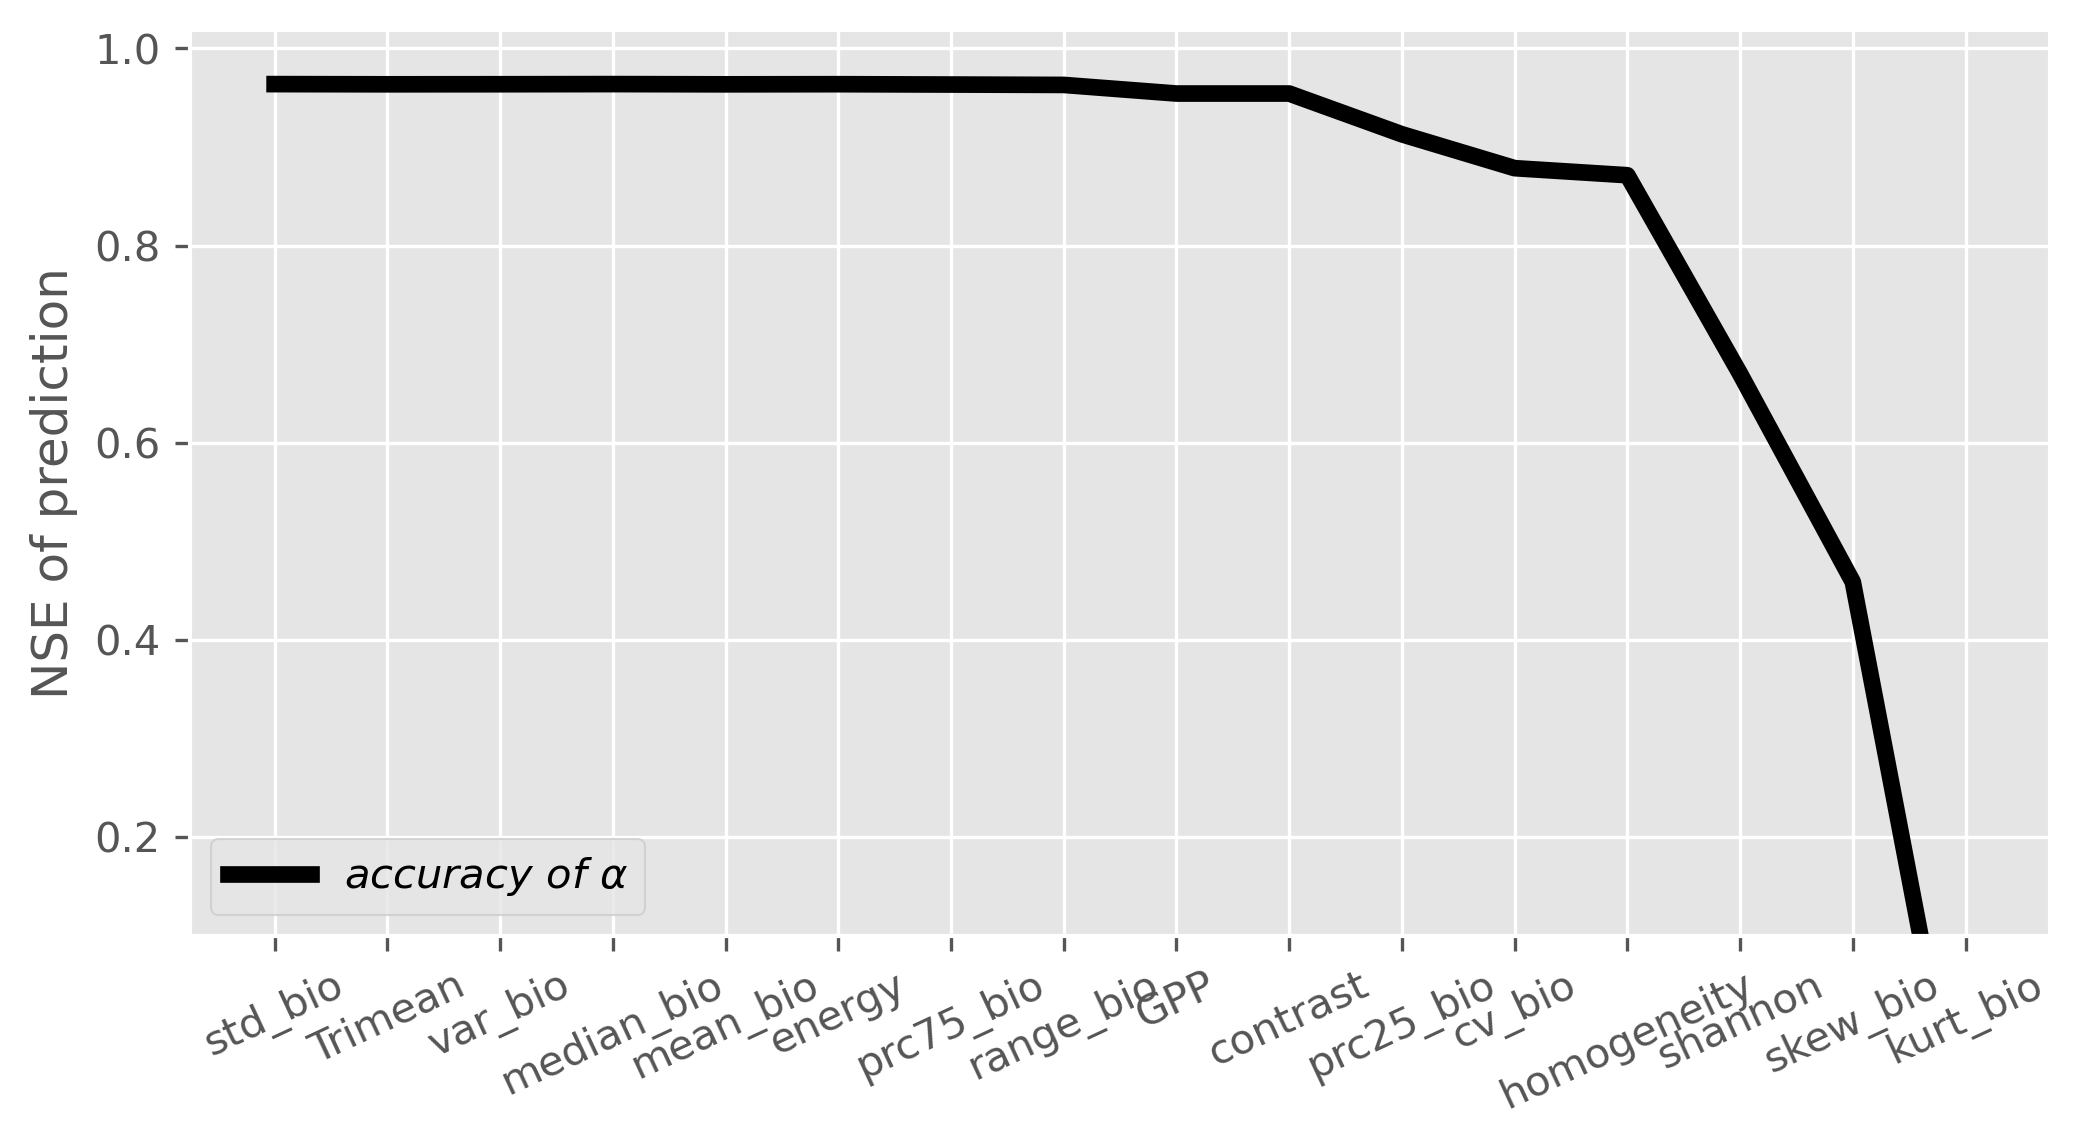

In [48]:

plt.style.use('ggplot')
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = (8,4)

plt.figure()
x = list(mu_features[:-1])
plt.plot(x,Multi_mus,c = 'r',linewidth=4,label = r'$accuracy\ of\ \mu$')
plt.xticks(rotation=25)
plt.ylabel('NSE of prediction')
plt.ylim(0.1)
plt.legend(loc='lower left')
plt.savefig('./Reduce_mu.png',dpi=300,bbox_inches = 'tight')

plt.figure()
x = list(beta_features[:-1])
#plt.plot(x,Multi_mus,label = 'Mu')
plt.plot(x,Multi_Iss,c = 'b',linewidth=4,label = r'$accuracy\ of\ \beta$')
#plt.plot(x,Multi_as,label = 'Alpha')
plt.xticks(rotation=25)
plt.ylim(0.1)
plt.ylabel('NSE of prediction')
plt.yticks([0.2,0.4,0.6,0.8,1.0])
plt.legend(loc='lower left')
plt.savefig('./Reduce_beta.png',dpi=300,bbox_inches = 'tight')

plt.figure()
x = list(alpha_features[:-1])
#plt.plot(x,Multi_mus,label = 'Mu')
# plt.plot(x,Multi_Iss,label = 'Beta')
plt.plot(x,Multi_as,c = 'k',linewidth=4,label = r'$accuracy\ of\ \alpha$')
plt.xticks(rotation=25)
plt.ylim(0.1)
plt.ylabel('NSE of prediction')
plt.legend(loc='lower left')
plt.savefig('./Reduce_alpha.png',dpi=300,bbox_inches = 'tight')

#plt.savefig('./featureimportance_reduce_multi.png',dpi=300,bbox_inches = 'tight')
plt.show()

# 3. Chained_output

In [ ]:
def Chained (df_train, df_test, mode, sequence, exclude_features):
    import warnings
    warnings.filterwarnings('ignore')
    
    df_train = df_train.reset_index(drop = True)
    
    if mode == '2+1':
        # 1st multioutput variables
        y1 = sequence[0]
        # 2nd multioutput variables
        y2 = sequence[1]
        # 3rd multioutput variables
        y3 = sequence[2]
    
        x_train = df_train.iloc[:,3:]
        y_train = df_train.iloc[:,[y1,y2]]
        x_test = df_test.iloc[:,3:]
        y_test = df_test.iloc[:,[y1,y2]]

        # fit model1
        model1 = RandomForestRegressor(n_jobs = 20)
        model1.fit(x_train.values, y_train.values)   

        # predict the y1 and y2 
        M1_pre = model1.predict(x_train.values)

        # add predicted y1 and y2 in the training set
        x_train_new = x_train.copy()
        x_train_new['Pred_y1'] = M1_pre[:,0]
        x_train_new['Pred_y2'] = M1_pre[:,1]
        
        # fit model2  
        y_y3_train = df_train.iloc[:,y3]
        y_y3_test = df_test.iloc[:,y3]
        model2 = RandomForestRegressor(n_jobs = 20)
        model2.fit(x_train_new.values, y_y3_train)


        # Test the model
        M1_pre_test = model1.predict(x_test)   
        x_test['Pred_y1'] = M1_pre_test[:,0]
        x_test['Pred_y2'] = M1_pre_test[:,1]
        y_y3_pred = model2.predict(x_test.values)
       
        y1_r2 = r2_score(df_test.iloc[:,y1], M1_pre_test[:,0])
        y2_r2 = r2_score(df_test.iloc[:,y2], M1_pre_test[:,1])
        y3_r2 = r2_score(df_test.iloc[:,y3], y_y3_pred)
        y1_nse = he.evaluator(he.nse,M1_pre_test[:,0],df_test.iloc[:,y1])
        y2_nse = he.evaluator(he.nse,M1_pre_test[:,1],df_test.iloc[:,y2])
        y3_nse = he.evaluator(he.nse,y_y3_pred,df_test.iloc[:,y3])
        
        my_plot(x_test['Pred_y1'],df_test.iloc[:,y1],y1_r2,y1_nse)
        plt.xlabel('Predicted y1')
        plt.ylabel('Prescribed y1')
        my_plot(x_test['Pred_y2'],df_test.iloc[:,y2],y2_r2,y2_nse)
        plt.xlabel('Predicted y2')
        plt.ylabel('Prescribed y2')
        my_plot(y_y3_pred,df_test.iloc[:,y3],y3_r2,y3_nse)
        plt.xlabel('Predicted y3')
        plt.ylabel('Prescribed y3')

        
    elif mode == '1+1+1':
        # 1st multioutput variables
        y1 = sequence[0]
        # 2nd multioutput variables
        y2 = sequence[1]
        # 3rd multioutput variables
        y3 = sequence[2]
        
        #------------------------------------------------------------------
        x_train_y1 = df_train.iloc[:,3:]
        y_train_y1 = df_train.iloc[:,y1]
        x_test_y1 = df_test.iloc[:,3:]
        y_test_y1 = df_test.iloc[:,y1]

        # fit model1
        model1 = RandomForestRegressor(n_jobs = 20)
        model1.fit(x_train_y1.values, y_train_y1.values)   

        # predict the y1 
        model1_output = model1.predict(x_train_y1.values)

        #------------------------------------------------------------------
        # add predicted y1 in the model2 training data
        x_train_y2 = x_train_y1.copy()
        x_train_y2['Pred_y1'] = model1_output
        
        # fit model2  
        y_train_y2 = df_train.iloc[:,y2]
        #y_y3_test = df_test.iloc[:,y3]
        model2 = RandomForestRegressor(n_jobs = 20)
        model2.fit(x_train_y2.values, y_train_y2)

        # predict the y2 
        model2_output = model2.predict(x_train_y2.values)

        #------------------------------------------------------------------
        # add predicted y2 in the model3 training data
        x_train_y3 = x_train_y2.copy()
        x_train_y3['Pred_y2'] = model2_output
        
        # fit model3  
        y_train_y3 = df_train.iloc[:,y3]
        #y_y3_test = df_test.iloc[:,y3]
        model3 = RandomForestRegressor(n_jobs = 20)
        model3.fit(x_train_y3.values, y_train_y3)

        # no need to predict y3 again 
  
        # Test the model
        test_y1 = model1.predict(x_test_y1)
        x_test_y1['Pred_y1'] = test_y1
        x_test_y2 = x_test_y1
        
        test_y2 =  model2.predict(x_test_y2.values)
        x_test_y2['Pred_y2'] = test_y2
        x_test_y3 = x_test_y2
        
        test_y3 =  model3.predict(x_test_y3.values)
        
        y1_r2 = r2_score(df_test.iloc[:,y1], test_y1)
        y2_r2 = r2_score(df_test.iloc[:,y2], test_y2)
        y3_r2 = r2_score(df_test.iloc[:,y3], test_y3)
        y1_nse = he.evaluator(he.nse,test_y1,df_test.iloc[:,y1])
        y2_nse = he.evaluator(he.nse,test_y2,df_test.iloc[:,y2])
        y3_nse = he.evaluator(he.nse,test_y3,df_test.iloc[:,y3])
        
        my_plot(test_y1,df_test.iloc[:,y1],y1_r2,y1_nse)
        plt.xlabel('Predicted y1')
        plt.ylabel('Prescribed y1')
        my_plot(test_y2,df_test.iloc[:,y2],y2_r2,y2_nse)
        plt.xlabel('Predicted y2')
        plt.ylabel('Prescribed y2')
        my_plot(test_y3,df_test.iloc[:,y3],y3_r2,y3_nse)
        plt.xlabel('Predicted y3')
        plt.ylabel('Prescribed y3')
        
    else:
        print('Mode argument input is wrong! Please type 1+1+1 or 2+1')
        
    return y1_nse, y2_nse, y3_nse

In [8]:
df_all = df_all.reset_index(drop = True)

allnames = list(df_all.columns.values.tolist())
my_cv = ShuffleSplit(n_splits = 10,test_size = .1)
index = 1
train_index = []
test_index = []

Multi_mus = []
Multi_Iss = []
Multi_as = []
Chained_mus = []
Chained_Iss = []
Chained_as = []
for train, test in my_cv.split(df_all.values):
    type(train)
    train_index.append(train)
    test_index.append(test)

for i in range(0,len(train_index)):
    df_train = df_all.iloc[train_index[i]]
    df_test = df_all.iloc[test_index[i]]
    #print('Shuffle No.{}'.format(i+1),'\n','Multi-Output:')
    a,b,c,model1,model2 = Chained_1(df_train, df_test, 'all')
    Chained_mus.append(a)
    Chained_Iss.append(b)
    Chained_as.append(c)
    importance1 = model1.feature_importances_
    names = allnames[3:]
    #plt.barh(names,importance)
    feature_importances = pd.DataFrame(importance1, index = names, columns=['importance']).sort_values('importance')
    plt.rcParams['figure.dpi'] = 120
    feature_importances.plot(kind = 'barh')
    
    importance2 = model2.feature_importances_
    add_names = ['Pre_mu','Pre_Beta']
    names = allnames[3:]
    names.extend(add_names)
    #plt.barh(names,importance)
    feature_importances2 = pd.DataFrame(importance2, index = names, columns=['importance']).sort_values('importance')
    feature_importances2.plot(kind = 'barh')
    break
    
#print('Multi-Output:','\n','  ','Mu:{}'.format(np.mean(Multi_mus)),'\n','  ','Is:{}'.format(np.mean(Multi_Iss)),'\n','  ','Alpha:{}'.format(np.mean(Multi_as)),'\n')
print('Chained-Output:','\n','  ','Mu:{}'.format(np.mean(Chained_mus)),'\n','  ','Is:{}'.format(np.mean(Chained_Iss)),'\n','  ','Alpha:{}'.format(np.mean(Chained_as)),'\n')

NameError: name 'Chained_1' is not defined

In [9]:
def Chained_2 (df_train, df_test, exclude_features):
    import warnings
    import hydroeval as he
    import numpy as np
    warnings.filterwarnings('ignore')
    
    df_train = df_train.reset_index(drop = True)
    
    x_train = df_train.iloc[:,3:]
    y_train = df_train.iloc[:,[0,2]]
    x_test = df_test.iloc[:,3:]
    y_test = df_test.iloc[:,[0,2]]
    
    my_cv = ShuffleSplit(n_splits = 10,test_size = .1)

    mu_r2s = []
    Is_r2s = []
    alpha_r2s = []

    mu_nses = []
    Is_nses = []
    alpha_nses = []

    # fit model1
    model1 = RandomForestRegressor(n_jobs = 20)
    model1.fit(x_train.values, y_train.values)   

    # predict the mu and Is by shuffle i+1
    M1_pre = model1.predict(x_train.values)

    # add predicted mu and Is in the training set
    x_train_new = x_train.copy()
    x_train_new['Pre_mu'] = M1_pre[:,0]
    x_train_new['Pre_Beta'] = M1_pre[:,1]
    
    for f in exclude_features:
        del x_train_new[f] # df_train = df_train.drop(f,1)
        
    
    # fit model2  
    y_alpha_train = df_train.iloc[:,1]
    y_alpha_test = df_test.iloc[:,1]
    model2 = RandomForestRegressor(n_jobs = 20)
    model2.fit(x_train_new.values, y_alpha_train)


    # Test the model
    
    M1_pre_test = model1.predict(x_test)   
    x_test['Pre_mu'] = M1_pre_test[:,0]
    x_test['Pre_Beta'] = M1_pre_test[:,1]
    for f in exclude_features:
        del x_test[f]
    
    y_alpha_pred = model2.predict(x_test.values)
    mu_r2 = r2_score(y_test['mu'], M1_pre_test[:,0])
    Is_r2 = r2_score(y_test['I_slope'], M1_pre_test[:,1])
    alpha_r2 = r2_score(y_alpha_test, y_alpha_pred)
    mu_nse = he.evaluator(he.nse,M1_pre_test[:,0],y_test['mu'])
    Is_nse = he.evaluator(he.nse,M1_pre_test[:,1],y_test['I_slope'])
    alpha_nse = he.evaluator(he.nse,y_alpha_pred,y_alpha_test)

    mu_r2s.append(mu_r2)
    Is_r2s.append(Is_r2)
    alpha_r2s.append(alpha_r2)
    mu_nses.append(mu_nse)
    Is_nses.append(Is_nse)
    alpha_nses.append(alpha_nse)

    rvalue = r2_score(y_alpha_test, y_alpha_pred)
    nse = he.evaluator(he.nse,y_alpha_pred,y_alpha_test)
       
        
    
        
    return np.mean(mu_nses),np.mean(Is_nses),np.mean(alpha_nses),model1, model2
    

In [10]:
Multi_mus = []
Multi_Iss = []
Multi_as = []

mu_beta_features = feature_importances.index
for i in range(0,len(mu_beta_features)-1):
    exclude_features1 = mu_beta_features[:i+1]
    df_train = df_all.iloc[train_index[0]]
    df_test = df_all.iloc[test_index[0]]
    
    for f in exclude_features1:
        del df_train[f] # df_train = df_train.drop(f,1)
        del df_test[f]
    
    
    a,b,c,model1,model2 = Chained_1(df_train, df_test, 'all')
    Multi_mus.append(a)
    Multi_Iss.append(b)

NameError: name 'feature_importances' is not defined

In [12]:
alpha_features = feature_importances2.index 
for i in range(0,len(alpha_features)-1):
    exclude_features2 = alpha_features[:i+1]
    df_train = df_all.iloc[train_index[0]]
    df_test = df_all.iloc[test_index[0]]
    a,b,c,model1,model2 = Chained_2(df_train, df_test, exclude_features2)
    Multi_as.append(c)

In [11]:
plt.figure()
x = list(mu_beta_features[:-1])
plt.plot(x,Multi_mus,label = 'Mu')
# plt.plot(x,Multi_Iss,label = 'Beta')
# plt.plot(x,Multi_as,label = 'Alpha')
plt.xticks(rotation=90)
plt.ylabel('NSE of prediction')
plt.legend()

plt.figure()
x = list(mu_beta_features[:-1])
#plt.plot(x,Multi_mus,label = 'Mu')
plt.plot(x,Multi_Iss,label = 'Beta')
#plt.plot(x,Multi_as,label = 'Alpha')
plt.xticks(rotation=90)
plt.ylabel('NSE of prediction')
plt.legend()

plt.figure()
x = list(alpha_features[:-1])
#plt.plot(x,Multi_mus,label = 'Mu')
# plt.plot(x,Multi_Iss,label = 'Beta')
plt.plot(x,Multi_as,label = 'Alpha')
plt.xticks(rotation=90)
plt.ylabel('NSE of prediction')
plt.legend()

NameError: name 'mu_beta_features' is not defined

<Figure size 720x480 with 0 Axes>